In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import venn

In [2]:
from matplotlib.pylab import mpl

In [3]:
datas = pd.DataFrame(columns=['datasets', 'log_p', 'is_shuffle'])

In [4]:
data1 = pd.read_csv('/home/wangkun/datas/megs/embryo2_all.csv', index_col=0)
data2 = pd.read_csv('/home/wangkun/datas/megs/embryo3_all.csv', index_col=0)
data_p = np.log10(np.concatenate((data1['p-value'], data2['p-value'])))

data1s = pd.read_csv('/home/wangkun/datas/shuffle_megs/embryo2_all_shuffle_meg.csv', index_col=0)
data2s = pd.read_csv('/home/wangkun/datas/shuffle_megs/embryo3_all_shuffle_megs.csv', index_col=0)
data_ps = np.log10(np.concatenate((data1s['p-value'], data2s['p-value'])))

embryo_megs = np.concatenate((data1.index, data2.index))

In [5]:
logp = np.concatenate((data_p, data_ps))
iss = np.concatenate(([False]*len(data_p), [True]*len(data_ps)))
dataset = np.array(['Embryo E8/E8.5']*len(logp))
data = np.vstack((dataset, logp, iss)).T
data = pd.DataFrame(data=data, columns=['datasets', 'log_p', 'is_shuffle'])

datas = datas.append(data)

In [6]:
data1 = pd.read_csv('/home/wangkun/datas/megs/3726_NT_T1.csv', index_col=0)
data2 = pd.read_csv('/home/wangkun/datas/megs/3435_NT_T1.csv', index_col=0)
data_p = np.log10(np.concatenate((data1['p-value'], data2['p-value'])))

data1s = pd.read_csv('/home/wangkun/datas/shuffle_megs/KP3435_shuffle_megs.csv', index_col=0)
data2s = pd.read_csv('/home/wangkun/datas/shuffle_megs/KP3726_shuffle_megs.csv', index_col=0)
data_ps = np.log10(np.concatenate((data1s['p-value'], data2s['p-value'])))

kp_megs = np.concatenate((data1.index, data2.index))

In [7]:
logp = np.concatenate((data_p, data_ps))
iss = np.concatenate(([False]*len(data_p), [True]*len(data_ps)))
dataset = np.array(['KP lung tumor']*len(logp))
data = np.vstack((dataset, logp, iss)).T
data = pd.DataFrame(data=data, columns=['datasets', 'log_p', 'is_shuffle'])

datas = datas.append(data)

In [8]:
data1 = pd.read_csv('/home/wangkun/datas/megs/KPCY.csv', index_col=0)
data_p = np.log10((data1['p-value']))

data1s = pd.read_csv('/home/wangkun/datas/shuffle_megs/EMT_shuffle_megs.csv', index_col=0)
data_ps = np.log10((data1s['p-value']))

kpcy_megs = np.array(data1.index)

In [9]:
logp = np.concatenate((data_p, data_ps))
iss = np.concatenate(([False]*len(data_p), [True]*len(data_ps)))
dataset = np.array(['KPCY']*len(logp))
data = np.vstack((dataset, logp, iss)).T
data = pd.DataFrame(data=data, columns=['datasets', 'log_p', 'is_shuffle'])

datas = datas.append(data)

In [10]:
data1 = pd.read_csv('/home/wangkun/datas/megs/A549_lg1.csv', index_col=0)
data2 = pd.read_csv('/home/wangkun/datas/megs/A549_lg2.csv', index_col=0)
data_p = np.log10(np.concatenate((data1['p-value'], data2['p-value'])))

data1s = pd.read_csv('/home/wangkun/datas/shuffle_megs/quinn_lg1_shuffle_megs.csv', index_col=0)
data2s = pd.read_csv('/home/wangkun/datas/shuffle_megs/quinn_lg2_shuffle_megs.csv', index_col=0)
data_ps = np.log10(np.concatenate((data1s['p-value'], data2s['p-value'])))

a549_megs = np.concatenate((data1.index, data2.index))

In [11]:
logp = np.concatenate((data_p, data_ps))
iss = np.concatenate(([False]*len(data_p), [True]*len(data_ps)))
dataset = np.array(['A549']*len(logp))
data = np.vstack((dataset, logp, iss)).T
data = pd.DataFrame(data=data, columns=['datasets', 'log_p', 'is_shuffle'])

datas = datas.append(data)

In [12]:
data1 = pd.read_csv('/home/wangkun/datas/megs/HEK293T.csv', index_col=0)
data_p = np.log10((data1['p-value']))

data1s = pd.read_csv('/home/wangkun/datas/shuffle_megs/HEK293_shuffle_megs.csv', index_col=0)
data_ps = np.log10((data1s['p-value']))

hek_megs = np.array(data1.index)

In [13]:
logp = np.concatenate((data_p, data_ps))
iss = np.concatenate(([False]*len(data_p), [True]*len(data_ps)))
dataset = np.array(['HEK293T']*len(logp))
data = np.vstack((dataset, logp, iss)).T
data = pd.DataFrame(data=data, columns=['datasets', 'log_p', 'is_shuffle'])

datas = datas.append(data)



In [14]:
datas['log_p'] = datas['log_p'].astype(float)

In [15]:
datas['log_p'] = np.clip(datas['log_p'], a_min=-20, a_max=2)

In [16]:
sns.set(font_scale=1.4)
sns.set_style('whitegrid')

In [17]:
def convert(x):
    if x == 'False':
        return 'Standard analysis'
    else:
        return 'Permutation analysis'

In [18]:
datas['new'] = datas['is_shuffle'].apply(convert)

Text(0.5, 0, '')

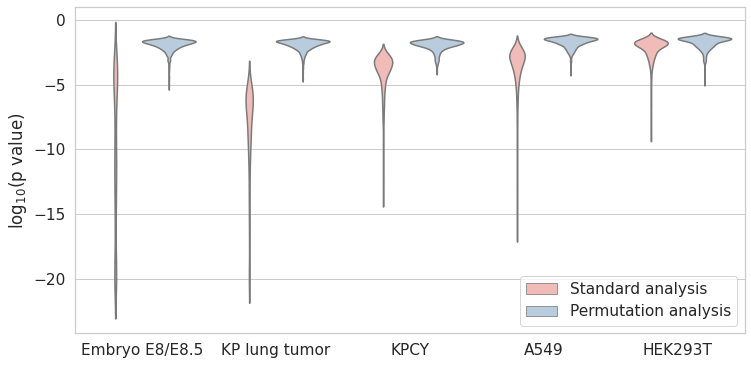

In [19]:
fig, ax = plt.subplots(figsize=(12,6))
sns.violinplot(data=datas, x='datasets', y='log_p', hue='new', palette="Pastel1", inner=None, ax=ax)

# ax.tick_params(axis='x', labelrotation=20)
ax.legend(loc=4)
ax.set_ylabel('log$_{10}$(p value)')
ax.set_xlabel('')
# x0,x1 = ax.get_xlim()
# ax.hlines(np.log10(0.01), x0, x1, linestyles='dashed', colors='black')
# ax.set_xlim(x0, x1)

In [20]:
import matplotlib

In [23]:
embryo_genes = set(list(pd.read_csv('/home/wangkun/datas/gene_list/embryo2.csv', index_col=0).to_numpy().flatten())).union(set(list(pd.read_csv('/home/wangkun/datas/gene_list/embryo3.csv', index_col=0).to_numpy().flatten())))
kp_genes = set(list(pd.read_csv('/home/wangkun/datas/gene_list/KP3435.csv', index_col=0).to_numpy().flatten())).union(set(list(pd.read_csv('/home/wangkun/datas/gene_list/KP3726.csv', index_col=0).to_numpy().flatten())))
a549_genes = set(list(pd.read_csv('/home/wangkun/datas/gene_list/lg1.csv', index_col=0).to_numpy().flatten())).union(set(list(pd.read_csv('/home/wangkun/datas/gene_list/lg2.csv', index_col=0).to_numpy().flatten())))
hek_genes = set(list(pd.read_csv('/home/wangkun/datas/gene_list/HEK293T.csv', index_col=0).to_numpy().flatten()))
kpcy_genes = set(list(pd.read_csv('/home/wangkun/datas/gene_list/KPCY.csv', index_col=0).to_numpy().flatten()))

(<Figure size 864x672 with 1 Axes>, <AxesSubplot:>)

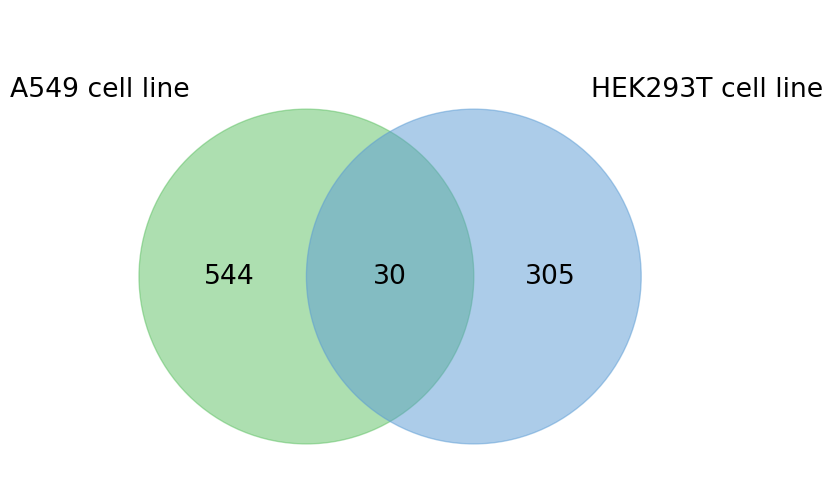

In [24]:
labels = venn.get_labels([a549_megs, hek_megs])
venn.venn2(labels, names=['A549 cell line', 'HEK293T cell line'], fontsize=20)

(<Figure size 864x864 with 1 Axes>, <AxesSubplot:>)

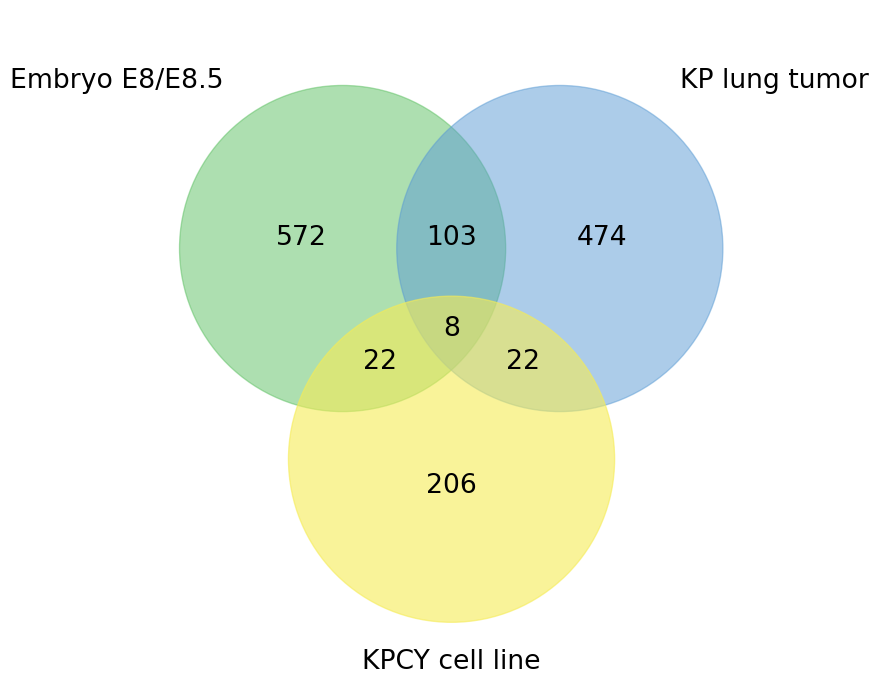

In [53]:
labels = venn.get_labels([embryo_megs, kp_megs, kpcy_megs])
venn.venn3(labels, names=['Embryo E8/E8.5', 'KP lung tumor', 'KPCY cell line'], fontsize=20)

(<Figure size 864x672 with 1 Axes>, <AxesSubplot:>)

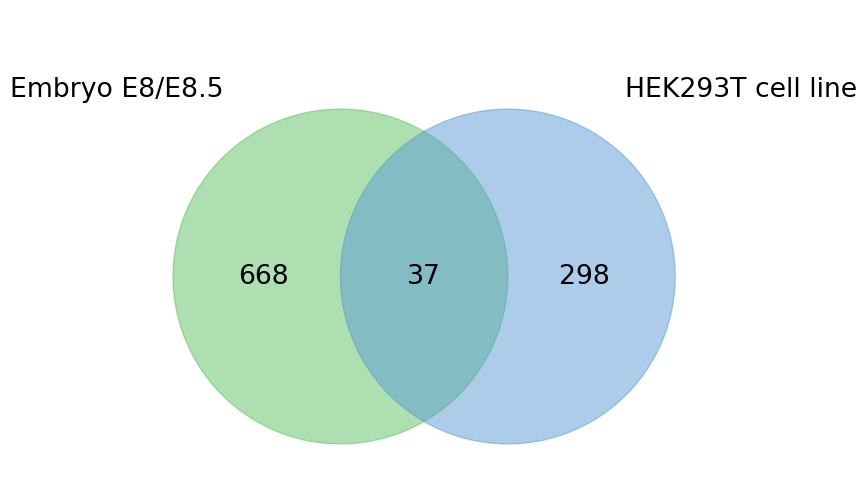

In [58]:
labels = venn.get_labels([set([i.lower() for i in embryo_megs]), set([i.lower() for i in hek_megs])])
venn.venn2(labels, names=['Embryo E8/E8.5', 'HEK293T cell line'], fontsize=20)

(<Figure size 864x864 with 1 Axes>, <AxesSubplot:>)

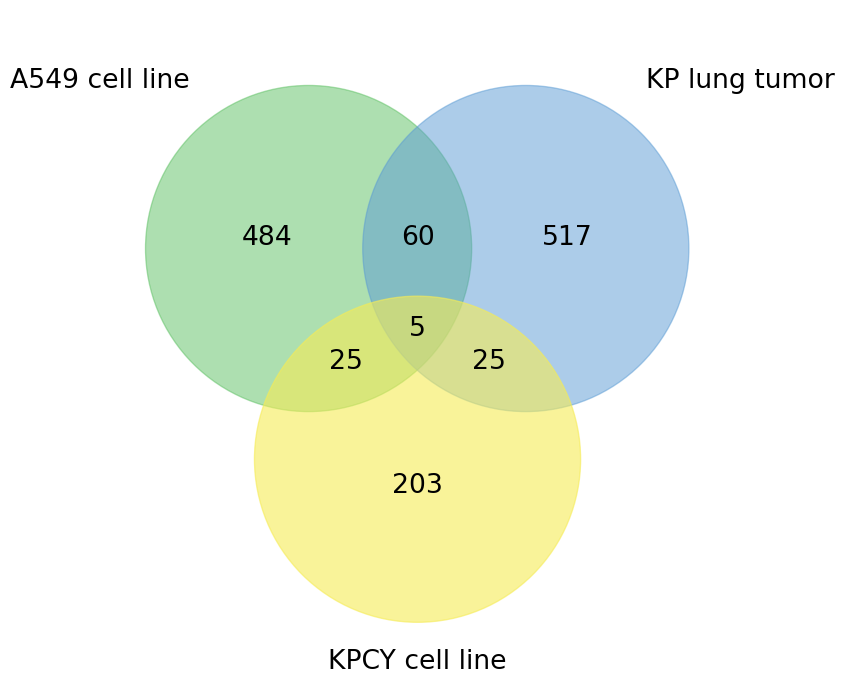

In [57]:
labels = venn.get_labels([set([i.lower() for i in a549_megs]), set([i.lower() for i in kp_megs]), set([i.lower() for i in kpcy_megs])])
venn.venn3(labels, names=['A549 cell line', 'KP lung tumor', 'KPCY cell line'], fontsize=20)